# Credit Card Retention Analysis

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.graph_objs as go
from plotly.offline import iplot
sns.set()
pd.options.display.max_columns = 999

In [80]:
data = pd.read_csv('../data/BankChurners_v2.csv')

In [10]:
data = data[['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',]]

In [14]:
data['Education_Level'] = data['Education_Level'].fillna('Unknown')
data['Marital_Status'] = data['Marital_Status'].fillna('Unknown')
data['Income_Category'] = data['Income_Category'].fillna('Unknown')

In [18]:
# https://towardsdatascience.com/data-preprocessing-with-python-pandas-part-5-binning-c5bd5fd1b950
bins = [25, 30, 40, 50, 60, 70, 80]
labels = ['20s', '30s', '40s', '50s', '60s', '70s']
data['Customer_Age_bins'] = pd.cut(data['Customer_Age'], bins=bins, labels=labels, include_lowest=True, right=False)

***

### Comparing Categories

Comparing histograms to bar charts, let's take a look at the same dimensions we used above (Age and Gender) and use a `barplot` to visualize these groups. The main difference here will be that we are **not looking at frequencies anymore**, we are specifying and plotting a measure of our choice. Here, we will look at `Credit_Limit` by Age and Gender. Let's plot! 

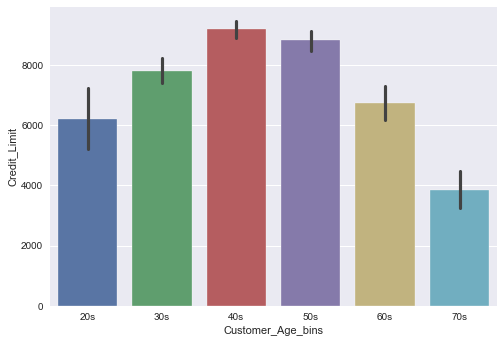

In [49]:
sns.barplot(x='Customer_Age_bins', y='Credit_Limit', data=data, estimator=np.mean);

Notice how I've passed through an estimator. When the data is given at the Customer level (not aggregated), then it will estimate the values for that group (the default is the mean, but we can switch that out). You'll notice `error bars` and this is to show that the bar height ends where the mean for that group is, but there are Customers with more or less, as dictated by the length of the error bar. 

Let's see what happens when we add in `Gender`, which we can do by specifying the `Hue`.

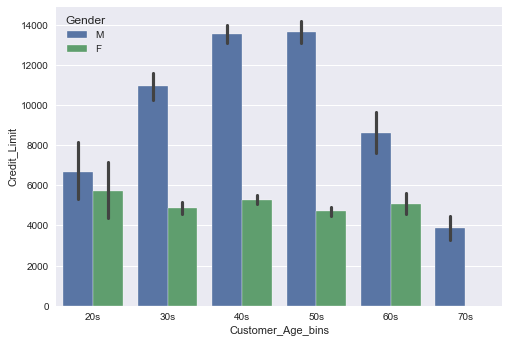

In [50]:
sns.barplot(x='Customer_Age_bins', y='Credit_Limit', hue='Gender', data=data, estimator=np.mean);

Notice how Females are getting credit limits much lower than Males! Interesting insight. Just to sanity check ourselves, let's try the median instead of the mean here. Let's swap that using the `estimator` parameter.

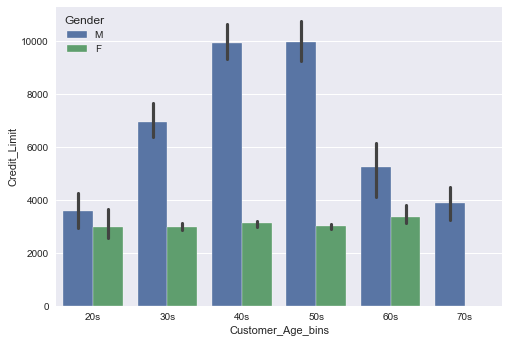

In [51]:
sns.barplot(x='Customer_Age_bins', y='Credit_Limit', hue='Gender', data=data, estimator=np.median);

Looks like it's true that men on average are getting accepted for much more than women are for our company. If we wanted a bar chart without the error bars, we would need to do a quick aggregation. Let's run the next line of code together and go over it in more detail in the next section. 

In [52]:
barplot = data.groupby(['Customer_Age_bins', 'Gender'])['Credit_Limit'].mean().reset_index()
barplot

,Customer_Age_bins,Gender,Credit_Limit
0,20s,F,5731.101075
1,20s,M,6649.367647
2,30s,F,4867.775314
3,30s,M,10948.605311
4,40s,F,5270.821784
5,40s,M,13557.484844
6,50s,F,4702.649475
7,50s,M,13635.717041
8,60s,F,5053.412857
9,60s,M,8626.832000


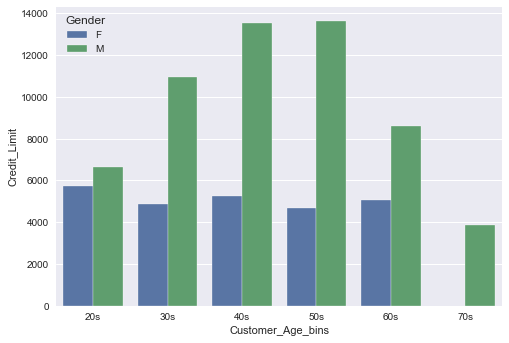

In [53]:
sns.barplot(x='Customer_Age_bins', y='Credit_Limit', hue='Gender', data=barplot);

We can turn the visual so that the bars go horizontally with just one parameter change. Let's try! Here we swap the default `orient` to "h".

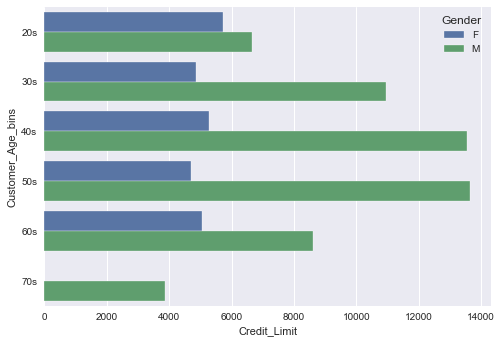

In [54]:
sns.barplot(x='Credit_Limit', y='Customer_Age_bins', hue='Gender', data=barplot, orient='h');

There are times where a bar chart may have too many categories that are too close to tell the difference between the heights. A small adaptation from the `Bar Chart` is the `Lollipop Chart`, let's make it together. 

In [55]:
lollipop = data.groupby(['Customer_Age_bins'])['Credit_Limit'].mean().reset_index().sort_values('Credit_Limit')
lollipop

,Customer_Age_bins,Credit_Limit
5,70s,3860.500000
0,20s,6211.425128
4,60s,6738.987925
1,30s,7790.933677
3,50s,8811.622181
2,40s,9178.870949


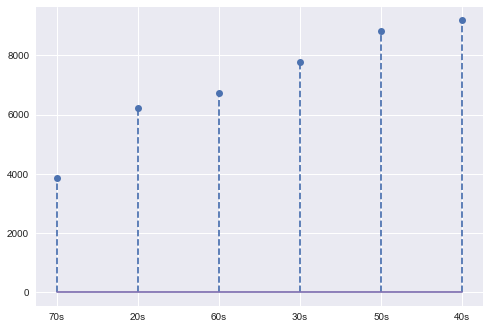

In [56]:
plt.stem(lollipop['Customer_Age_bins'], lollipop['Credit_Limit'], linefmt='--');

Most common, is to see this chart with the bars flowing **horizontally** and **sorted** from highest to lowest so we can visually pick up how the categories compare with one another. Otherwise they can be more confusing to read so use your best judgement on when to use them. We can do that here with the following code: 

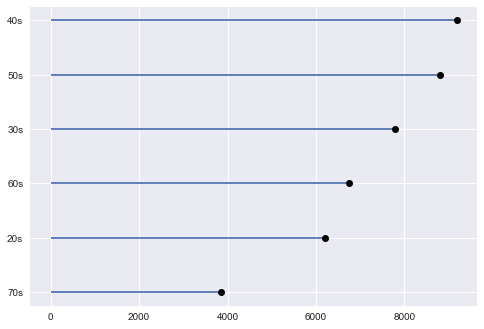

In [57]:
# https://jonathansoma.com/lede/foundations-2018/pandas/creating-lollipop-charts-with-pandas-and-matplotlib/
fig, ax = plt.subplots()
ax.hlines(lollipop['Customer_Age_bins'], xmin=0, xmax=lollipop['Credit_Limit'])
ax.plot(lollipop['Credit_Limit'], lollipop['Customer_Age_bins'], "o", color='black');

More inspiration for Lollipop charts can be found [here](https://www.tvhahn.com/posts/beautiful-plots-lollipop/)